# Data Preparation

This notebook is dedicated to the data preparation. We will load the data, check for missing values, and perform some basic data exploration.

In [1]:
from finvader import finvader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## News Headlines Data

VADER, Valence Aware Dictionary and sEntiment Reasoner, is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. The VADER classifier is a mainstream model for sentiment analysis using a general-language human-curated lexicon, including linguistic features expressed on social media. As such, the model works worse on texts that use domain-specific language, such as finance or economics.

VADER can be fine-tuned to specific domains, such as finance, by providing a list of domain-specific words and their associated sentiment scores. The sentiment score of a text can be computed by summing up the sentiment scores of each word in the text. The sentiment score of a text can be positive, negative, or neutral. The sentiment score of a text can also be a compound score that calculates the sum of all the lexicon ratings which have been normalized between -1 and 1.

FinVADER is a financial sentiment analysis tool that is based on VADER. FinVADER is a fine-tuned version of VADER for Sentiment Analysis in the financial domain. Using VADER as its base, FinVADER includes 2 finance lexicons, SentiBignomics and Henry's word list. SentiBigNomics is a detailed financial lexicon for aspect-based sentiment analysis with approximately 7300 terms containing a polarity score ranging in [-1,1] for each item. Henry's lexicon covers 189 words appearing in the company earnings press releases.


The financial news headlines are not pre-processed before using VADER. There are various reasons to not perform pre-processing steps before using FinVADER. 

1. The financial news headlines are already short and concise.

2. Punctuation can increase the intensity of the sentiment expressed in the text. For example, “I am happy” and “I am happy!!!” have different sentiment scores.

3. The sentiment expressed in the text can be affected by the use of capital letters. For example, “I am happy” and “I AM HAPPY” have different sentiment scores.

3. Degree modifiers such as 'very' and 'extremely' can increase the intensity of the sentiment expressed in the text. For example, “I am happy” and “I am extremely happy” have different sentiment scores.

4. The use of 'but' in a sentence can reverse the sentiment expressed in the text. For example, “I am happy but sad” and “I am happy and sad” have different sentiment scores.

5. Analysing tri-grams preceding a lexical feature: this allows VADER to identify shifts where the negation flips the polarity of the text.

https://towardsdatascience.com/are-you-scared-vader-understanding-how-nlp-pre-processing-impacts-vader-scoring-4f4edadbc91d

In [2]:
# Read in the data from Reuters
df_reuters = pd.read_csv('reuters_headlines.csv')
df_reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [3]:
# Drop the 'Description' column
df_reuters = df_reuters[['Headlines', 'Time']]

# Drop the rows with missing values
df_reuters = df_reuters.dropna()

# Convert the 'time' column to 'yyyy-mm-dd' format
df_reuters['Time'] = pd.to_datetime(df_reuters['Time']).dt.strftime('%Y-%m-%d')

df_reuters['Headlines'] = df_reuters['Headlines'].str.replace('\n', '')
# remove the leading and trailing whitespaces
df_reuters['Headlines'] = df_reuters['Headlines'].str.strip()
# remove punctuations
df_reuters['Headlines'] = df_reuters['Headlines'].str.replace('[^\w\s]','')
# remove special characters
df_reuters['Headlines'] = df_reuters['Headlines'].str.replace(':', '')

# sort the dataframe by date
df_reuters.sort_values(by=['Time'], inplace=True, ascending=True)

df_reuters.reset_index(drop=True, inplace=True)

df_reuters.head()

,Headlines,Time
0,UK will always consider ways to improve data l...,2018-03-20
1,Senate Democrat wants Facebook CEO Zuckerberg ...,2018-03-20
2,"Factbox How United States, others regulate aut...",2018-03-20
3,Cambridge Analytica played key Trump campaign ...,2018-03-20
4,Start of AT&T-Time Warner trial delayed until ...,2018-03-20


In [4]:
df_reuters['finvader'] = df_reuters['Headlines'].apply(
    finvader,
    use_sentibignomics=True,
    use_henry=True,
    indicator="compound")

df_reuters.head()

,Headlines,Time,finvader
0,UK will always consider ways to improve data l...,2018-03-20,0.1943
1,Senate Democrat wants Facebook CEO Zuckerberg ...,2018-03-20,0.0000
2,"Factbox How United States, others regulate aut...",2018-03-20,0.4253
3,Cambridge Analytica played key Trump campaign ...,2018-03-20,0.1697
4,Start of AT&T-Time Warner trial delayed until ...,2018-03-20,-0.2359


In [5]:
df_cnbc = pd.read_csv('cnbc_headlines.csv')
df_cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [6]:
df_cnbc = df_cnbc[['Headlines', 'Time']]
# remove NaN values
df_cnbc.dropna(inplace=True)

# Convert the 'time' column to 'yyyy-mm-dd' format
df_cnbc['Time'] = pd.to_datetime(df_cnbc['Time']).dt.strftime('%Y-%m-%d')

df_cnbc['Headlines'] = df_cnbc['Headlines'].str.replace('\n', '')
# remove the leading and trailing whitespaces
df_cnbc['Headlines'] = df_cnbc['Headlines'].str.strip()
# remove punctuations
df_cnbc['Headlines'] = df_cnbc['Headlines'].str.replace('[^\w\s]','')
# remove special characters
df_cnbc['Headlines'] = df_cnbc['Headlines'].str.replace(':', '')
df_cnbc['Headlines'] = df_cnbc['Headlines'].str.replace('—', '')

df_cnbc = df_cnbc.sort_values('Time')

df_cnbc.reset_index(drop=True, inplace=True)

df_cnbc.head()

,Headlines,Time
0,Cramer Never buy a stock all at once you'll a...,2017-12-22
1,Cramer I helped investors through the 2010 fla...,2017-12-22
2,Cramer says owning too many stocks and too lit...,2017-12-22
3,Markets lack Christmas cheer,2017-12-26
4,S&P tends to start new year bullish after this...,2017-12-27


In [7]:
df_cnbc['finvader'] = df_cnbc['Headlines'].apply(
    finvader,
    use_sentibignomics=True,
    use_henry=True,
    indicator="compound")

df_cnbc.head()

,Headlines,Time,finvader
0,Cramer Never buy a stock all at once you'll a...,2017-12-22,0.0090
1,Cramer I helped investors through the 2010 fla...,2017-12-22,-0.0207
2,Cramer says owning too many stocks and too lit...,2017-12-22,0.0232
3,Markets lack Christmas cheer,2017-12-26,0.0052
4,S&P tends to start new year bullish after this...,2017-12-27,-0.0013


In [8]:
df_guardian = pd.read_csv('guardian_headlines.csv')
df_guardian.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [9]:
df_guardian[['Headlines', 'Time']]

# remove NaN values
df_guardian.dropna(inplace=True)

# Convert the 'time' column to 'yyyy-mm-dd' format
df_guardian['Time'] = pd.to_datetime(df_guardian['Time'], errors='coerce').dt.strftime('%Y-%m-%d')
df_guardian.dropna(subset=['Time'], inplace=True)

# remove '\n' from the 'Headlines' column
df_guardian['Headlines'] = df_guardian['Headlines'].str.replace('\n', '')
# remove the leading and trailing whitespaces
df_guardian['Headlines'] = df_guardian['Headlines'].str.strip()
# remove punctuations
df_guardian['Headlines'] = df_guardian['Headlines'].str.replace('[^\w\s]','')
# remove special characters
df_guardian['Headlines'] = df_guardian['Headlines'].str.replace(':', '')
df_guardian['Headlines'] = df_guardian['Headlines'].str.replace('—', '')

df_guardian = df_guardian.sort_values('Time')

df_guardian.reset_index(drop=True, inplace=True)

df_guardian.head()

,Time,Headlines
0,2017-12-17,The Guardian view on Ryanair’s model a union-f...
1,2017-12-17,Peter Preston on press and broadcasting Pau...
2,2017-12-17,Why business could prosper under a Corbyn gove...
3,2017-12-17,Youngest staff to be given UK workplace pensio...
4,2017-12-17,Grogonomics This year has been about compan...


In [10]:
df_guardian['finvader'] = df_guardian['Headlines'].apply(
    finvader,
    use_sentibignomics=True,
    use_henry=True,
    indicator="compound")

df_guardian.head()

,Time,Headlines,finvader
0,2017-12-17,The Guardian view on Ryanair’s model a union-f...,0.0000
1,2017-12-17,Peter Preston on press and broadcasting Pau...,0.3612
2,2017-12-17,Why business could prosper under a Corbyn gove...,-0.3400
3,2017-12-17,Youngest staff to be given UK workplace pensio...,-0.1921
4,2017-12-17,Grogonomics This year has been about compan...,0.0000


In [11]:
print(df_reuters['Time'].min())
print(df_reuters['Time'].max())
print(df_reuters.count())
print()
print(df_cnbc['Time'].min())
print(df_cnbc['Time'].max())
print(df_cnbc.count())
print()
print(df_guardian['Time'].min())
print(df_guardian['Time'].max())
print(df_guardian.count())

2018-03-20
2020-07-18
Headlines    32770
Time         32770
finvader     32770
dtype: int64

2017-12-22
2020-07-17
Headlines    2800
Time         2800
finvader     2800
dtype: int64

2017-12-17
2020-07-18
Time         17760
Headlines    17760
finvader     17760
dtype: int64


In [12]:
# combine the 3 news headlines dataframes from Reuters, CNBC, and The Guardian
df = pd.concat([df_reuters, df_cnbc, df_guardian], ignore_index=True)

# add a new column 'Source' to the dataframe
df['Source'] = pd.concat([pd.Series(['Reuters']*len(df_reuters)), pd.Series(['CNBC']*len(df_cnbc)), pd.Series(['Guardian']*len(df_guardian))], ignore_index=True)

# sort the dataframe by date
df = df.sort_values('Time')

# round the finvader score to 2 decimal places
df['finvader_rounded'] = df['finvader'].apply(lambda x: round(x, 1))

# reset the index
df.reset_index(drop=True, inplace=True)

df.head()

,Headlines,Time,finvader,Source,finvader_rounded
0,The Guardian view on Ryanair’s model a union-f...,2017-12-17,0.0000,Guardian,0.0
1,Hundreds to lose jobs as Britvic shuts down No...,2017-12-17,-0.3716,Guardian,-0.4
2,British Steel pension scheme members ‘preyed o...,2017-12-17,0.0000,Guardian,0.0
3,‘Going to the Furniture Ombudsman about our so...,2017-12-17,-0.0116,Guardian,-0.0
4,"Uber stole trade secrets, bribed foreign offic...",2017-12-17,0.0717,Guardian,0.1


In [13]:
conditions = [
    df['finvader_rounded'] > 0.5,
    (df['finvader_rounded'] > 0) & (df['finvader_rounded'] <= 0.5),
    df['finvader_rounded'] == 0,
    (df['finvader_rounded'] < 0) & (df['finvader_rounded'] >= -0.5)
]

choices = [
    4,
    3,
    2,
    1
]

df['Label'] = np.select(conditions, choices, default=0)
df.head()

,Headlines,Time,finvader,Source,finvader_rounded,Label
0,The Guardian view on Ryanair’s model a union-f...,2017-12-17,0.0000,Guardian,0.0,2
1,Hundreds to lose jobs as Britvic shuts down No...,2017-12-17,-0.3716,Guardian,-0.4,1
2,British Steel pension scheme members ‘preyed o...,2017-12-17,0.0000,Guardian,0.0,2
3,‘Going to the Furniture Ombudsman about our so...,2017-12-17,-0.0116,Guardian,-0.0,2
4,"Uber stole trade secrets, bribed foreign offic...",2017-12-17,0.0717,Guardian,0.1,3


In [14]:
df['Label'].value_counts()

Label
2    26773
1    12578
3    10415
0     1892
4     1672
Name: count, dtype: int64

In [15]:
df.to_csv('combined_news_headlines.csv', index=False)

## Stock Price Data

The stock price data and the sentiment scores obtained from FinVADER will be combined to create the dataset for the stock price prediction model.

The stock prediction model is an LSTM model that uses the stock price data and the sentiment scores as input features to predict the stock price.

Import the SPX data downloaded from Yahoo Finance. 

In [16]:
# load the S&P 500 stock price dataset
df_time_series = pd.read_csv('SPX.csv')
# show top 5 rows
df_time_series.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,2685.919922,2694.969971,2685.919922,2690.159912,2690.159912,3727770000
1,2017-12-19,2692.709961,2694.439941,2680.739990,2681.469971,2681.469971,3407680000
2,2017-12-20,2688.179932,2691.010010,2676.110107,2679.250000,2679.250000,3246230000
3,2017-12-21,2683.020020,2692.639893,2682.399902,2684.570068,2684.570068,3293130000
4,2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2401030000


Remove the unnecessary columns that will not be used for stock price prediction.

In [17]:
# drop unnecessary columns
df_time_series = df_time_series.drop(['Open', 'High', 'Low', 'Volume', 'Close'], axis=1)

# convert the 'Date' column to datetime format
df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])

# show top 5 rows
df_time_series.head()

,Date,Adj Close
0,2017-12-18,2690.159912
1,2017-12-19,2681.469971
2,2017-12-20,2679.250000
3,2017-12-21,2684.570068
4,2017-12-22,2683.340088


In [18]:
df_time_series.to_csv('SPX_clean.csv', index=False)

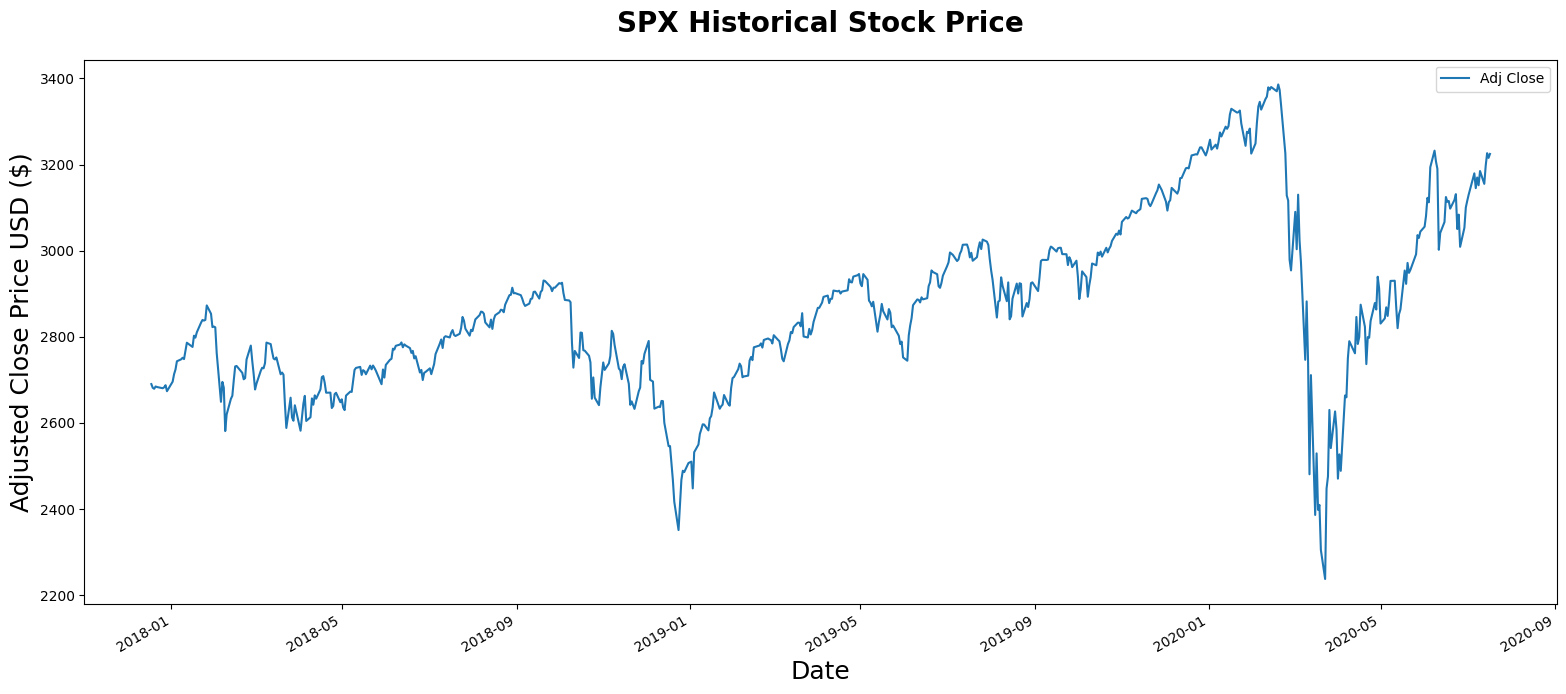

In [19]:
# plot the stock price data
df_time_series.plot(x='Date', figsize=(19, 8))
plt.title('SPX Historical Stock Price', fontsize=20, pad=20, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Price USD ($)', fontsize=18)
plt.show()